In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from datetime import date, datetime

In [13]:
# Get stock quotes
start = "2015-05-27"
end = "2020-05-23"

df = yf.download("AAPL", start, end)

[*********************100%***********************]  1 of 1 completed


In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-27,32.584999,33.064999,32.512501,33.009998,29.868664,183332800
2015-05-28,32.965000,32.987499,32.775002,32.945000,29.809860,122933200
2015-05-29,32.807499,32.862499,32.474998,32.570000,29.470547,203538000
2015-06-01,32.570000,32.847500,32.512501,32.634998,29.529352,128451200
2015-06-02,32.465000,32.665001,32.330002,32.490002,29.398153,134670400


In [15]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-18,78.292503,79.125000,77.580002,78.739998,77.307068,135178400
2020-05-19,78.757500,79.629997,78.252502,78.285004,76.860352,101729600
2020-05-20,79.169998,79.879997,79.129997,79.807503,78.355133,111504800
2020-05-21,79.665001,80.222504,78.967499,79.212502,77.770966,102688800
2020-05-22,78.942497,79.807503,78.837502,79.722504,78.271698,81803200


In [16]:
df1 = df.reset_index()["Close"]
df1

0       33.009998
1       32.945000
2       32.570000
3       32.634998
4       32.490002
          ...    
1253    78.739998
1254    78.285004
1255    79.807503
1256    79.212502
1257    79.722504
Name: Close, Length: 1258, dtype: float64

In [17]:
df1.shape

(1258,)

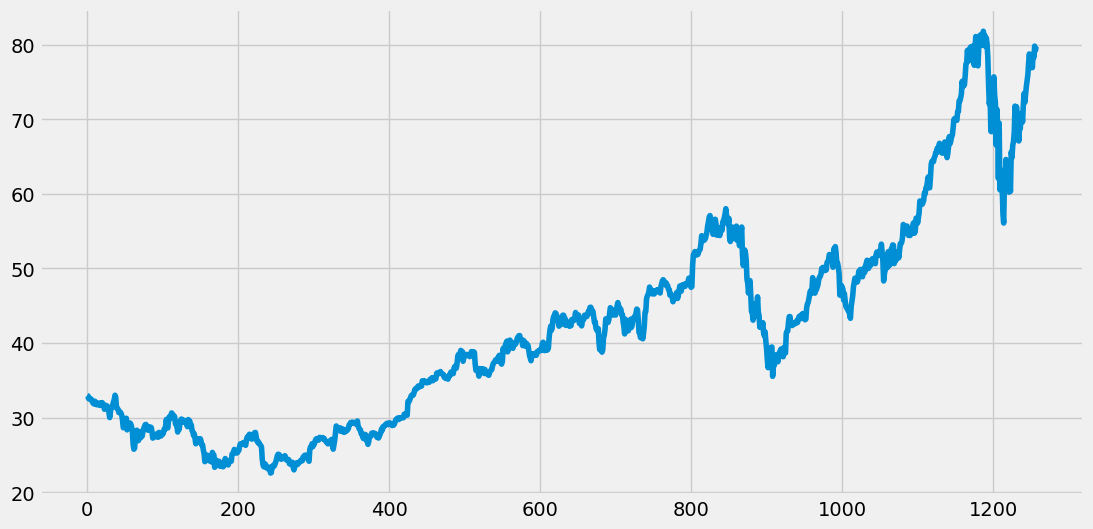

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df1)

In [20]:
# Apply MinMaxScaler for training
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [24]:
df1.shape

(1258, 1)

In [25]:
# Split data into train and test
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
training_size,test_size

(817, 441)

In [35]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [36]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [37]:
print(x_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [38]:
print(x_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [39]:
print(x_train)

[[0.17605334 0.17495567 0.16862281 ... 0.09055984 0.08388922 0.09085537]
 [0.17495567 0.16862281 0.16972049 ... 0.08388922 0.09085537 0.08739341]
 [0.16862281 0.16972049 0.16727184 ... 0.09085537 0.08739341 0.09030653]
 ...
 [0.34801149 0.32930843 0.32145569 ... 0.50042215 0.50413745 0.5062062 ]
 [0.32930843 0.32145569 0.32694417 ... 0.50413745 0.5062062  0.51920967]
 [0.32145569 0.32694417 0.32230006 ... 0.5062062  0.51920967 0.53719495]]


In [40]:
# Reshape input as required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [41]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [42]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 116ms/step - loss: 0.0116 - val_loss: 0.0652
Epoch 2/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0029 - val_loss: 0.0054
Epoch 3/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 4/100
12/12 [==============================] - 1s 81ms/step - loss: 7.9677e-04 - val_loss: 0.0041
Epoch 5/100
12/12 [==============================] - 1s 80ms/step - loss: 6.5321e-04 - val_loss: 0.0060
Epoch 6/100
12/12 [==============================] - 1s 83ms/step - loss: 6.0156e-04 - val_loss: 0.0050
Epoch 7/100
12/12 [==============================] - 1s 82ms/step - loss: 5.9305e-04 - val_loss: 0.0042
Epoch 8/100
12/12 [==============================] - 1s 84ms/step - loss: 5.7263e-04 - val_loss: 0.0056
Epoch 9/100
12/12 [==============================] - 1s 83ms/step - loss: 5.9294e-04 - val_loss: 0.0037
Epoch 10/100
12/12 [==============================] - 1s 85ms/step - loss: 

12/12 [==============================] - 1s 85ms/step - loss: 1.8933e-04 - val_loss: 0.0013
Epoch 80/100
12/12 [==============================] - 1s 87ms/step - loss: 1.8854e-04 - val_loss: 0.0012
Epoch 81/100
12/12 [==============================] - 1s 86ms/step - loss: 1.9138e-04 - val_loss: 0.0014
Epoch 82/100
12/12 [==============================] - 1s 87ms/step - loss: 2.1151e-04 - val_loss: 0.0013
Epoch 83/100
12/12 [==============================] - 1s 86ms/step - loss: 1.8627e-04 - val_loss: 0.0012
Epoch 84/100
12/12 [==============================] - 1s 85ms/step - loss: 1.7594e-04 - val_loss: 0.0014
Epoch 85/100
12/12 [==============================] - 1s 88ms/step - loss: 1.9412e-04 - val_loss: 0.0012
Epoch 86/100
12/12 [==============================] - 1s 87ms/step - loss: 1.7956e-04 - val_loss: 0.0014
Epoch 87/100
12/12 [==============================] - 1s 88ms/step - loss: 1.8134e-04 - val_loss: 0.0014
Epoch 88/100
12/12 [==============================] - 1s 84ms/step -

In [46]:
model.save("us_stock_model")

INFO:tensorflow:Assets written to: us_stock_model/assets


INFO:tensorflow:Assets written to: us_stock_model/assets


In [47]:
# Load Model
from keras.models import load_model
model = load_model("us_stock_model")

In [48]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 12ms/step


In [49]:
## Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [50]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

35.31608495454845

In [52]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

59.0621167177876

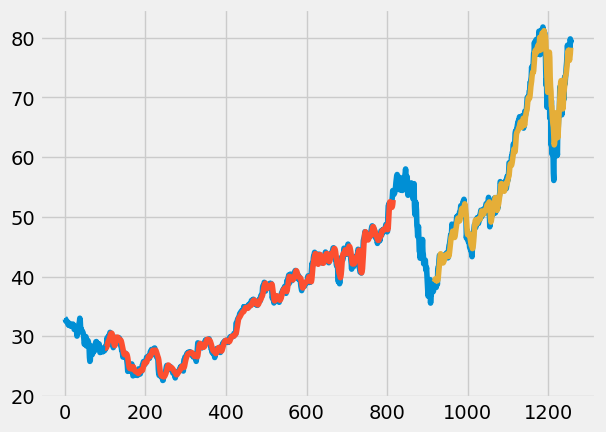

In [58]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [59]:
testPredictPlot

array([[        nan],
       [        nan],
       [        nan],
       ...,
       [77.33114624],
       [78.34255219],
       [        nan]])

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(lst_output)